In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('1st_page_ro42_coordinates.csv')
df.head()

,Unnamed: 0,Char,x0,x1,width,y0,y1,height
0,0,N,14.17327,19.50027,5.327,47.57959,54.57959,7.0
1,1,u,19.29027,23.16827,3.878,47.57959,54.57959,7.0
2,2,m,22.95827,28.89427,5.936,47.57959,54.57959,7.0
3,3,ă,28.67727,32.71627,4.039,47.57959,54.57959,7.0
4,4,r,32.50627,34.96327,2.457,47.57959,54.57959,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1108 non-null   int64  
 1   Char        1108 non-null   object 
 2   x0          1108 non-null   float64
 3   x1          1108 non-null   float64
 4   width       1108 non-null   float64
 5   y0          1108 non-null   float64
 6   y1          1108 non-null   float64
 7   height      1108 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 69.4+ KB


In [4]:
df['x_center'] = (df['x0'] + df['x1']) / 2
df['y_center'] = (df['y0'] + df['y1']) / 2

In [5]:
features = ['x_center', 'y_center', 'height']

In [6]:
df[features]

,x_center,y_center,height
0,16.83677,51.07959,7.0
1,21.22927,51.07959,7.0
2,25.92627,51.07959,7.0
3,30.69677,51.07959,7.0
4,33.73477,51.07959,7.0
...,...,...,...
1103,531.15466,14.40456,6.0
1104,533.99866,14.40456,6.0
1105,536.84266,14.40456,6.0
1106,540.09166,14.40456,6.0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df[features])
# X_scaled['y_center'] = X_scaled['y_center'] * 2

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[features])
X_scaled

array([[0.00371075, 0.04741826, 0.02638745],
       [0.01207417, 0.04741826, 0.02638745],
       [0.02101737, 0.04741826, 0.02638745],
       ...,
       [0.99381383, 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.99966851, 0.01716054, 0.10554981]])

In [8]:
X_scaled[:,1] *= 5
X_scaled

array([[0.00371075, 0.23709132, 0.02638745],
       [0.01207417, 0.23709132, 0.02638745],
       [0.02101737, 0.23709132, 0.02638745],
       ...,
       [0.99381383, 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.99966851, 0.08580268, 0.10554981]])

In [9]:
best_eps = [0.065, 0.06, 0.55]

In [10]:
dbscan = DBSCAN(eps=0.055, min_samples=1)
dbscan.fit(X_scaled)

DBSCAN(eps=0.055, min_samples=1)

In [11]:
dbscan.labels_

array([ 0,  0,  0, ..., 81, 81, 82], dtype=int64)

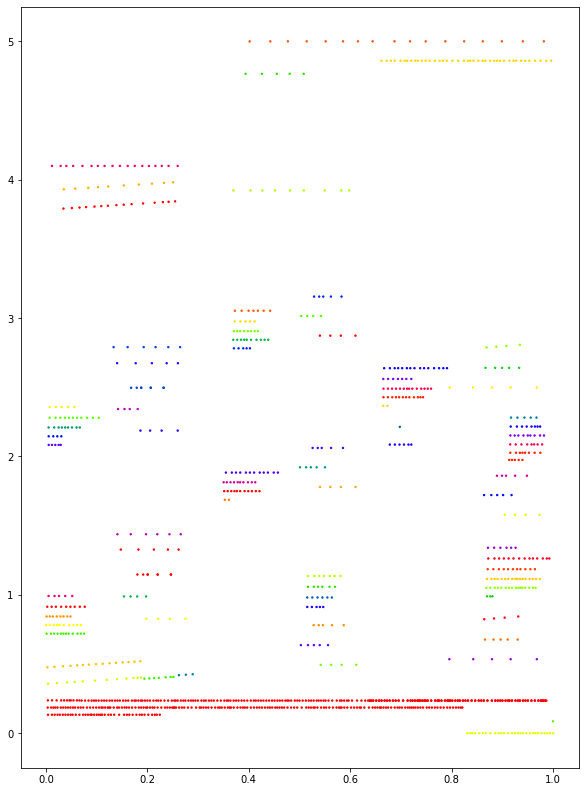

In [12]:
plt.figure(figsize=(10,14))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=2, c=dbscan.labels_, cmap='prism')
plt.show()

In [13]:
df['labels'] = dbscan.labels_

In [14]:
df[df['labels'] == 8]

,Unnamed: 0,Char,x0,x1,width,y0,y1,height,x_center,y_center,labels
535,535,-,465.959916,471.523887,5.563971,132.055519,151.514500,19.458981,468.741901,141.785009,8
536,536,2,474.150141,483.536217,9.386076,132.772048,152.565409,19.793361,478.843179,142.668728,8
537,537,0,485.089270,494.607143,9.517873,133.729067,153.533959,19.804891,489.848207,143.631513,8
538,538,%,496.254301,511.590059,15.335758,134.705860,155.019734,20.313874,503.922180,144.862797,8


In [15]:
from functools import reduce

In [16]:
def concatenate(series):
    return reduce(lambda x, y: x + y, series)

words = df.groupby('labels').agg({'Char': concatenate,
                                  'x0': min,
                                  'x1': max,
                                  'y0': min,
                                  'y1': max})
words

,Char,x0,x1,y0,y1
labels,,,,,
0,Numărul 42 *Revista este valabilă în perioada:...,14.173270,533.930830,31.578590,54.579590
1,OFERTĂ ANIVERSARĂ,213.627170,541.733274,772.787840,802.894840
2,valabilă în perioada: 14.10 - 20.10.2020*,359.631070,540.248859,761.429930,770.935530
3,de premii,199.842570,333.012570,606.163080,636.163080
4,Peste,211.752560,290.142560,736.573050,766.573050
...,...,...,...,...,...
78,Longlife,492.696870,531.415870,332.230380,342.230380
79,AA / AAA1 set,492.696960,529.728960,315.946900,331.946900
80,LUNI&MARȚI,28.664871,149.007395,612.699859,639.800843


In [17]:
words.to_csv('1st_page_ro42_words.csv')

In [18]:
X = df[features].copy(deep=True)

In [19]:
epsilons = [0.05, 0.1, 0.3, 0.8, 2, 5, 10]
min_sample_list = [1]

In [20]:
dbscan = DBSCAN(eps=5, min_samples=1)

In [21]:
len(X)

1108

In [22]:
dbscan.fit(X)

DBSCAN(eps=5, min_samples=1)

In [23]:
dbscan.labels_

array([  0,   0,   0, ..., 369, 369, 370], dtype=int64)

In [51]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# agg_clustering = AgglomerativeClustering()
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
clusters = agg_clustering.fit(X_scaled)

In [52]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

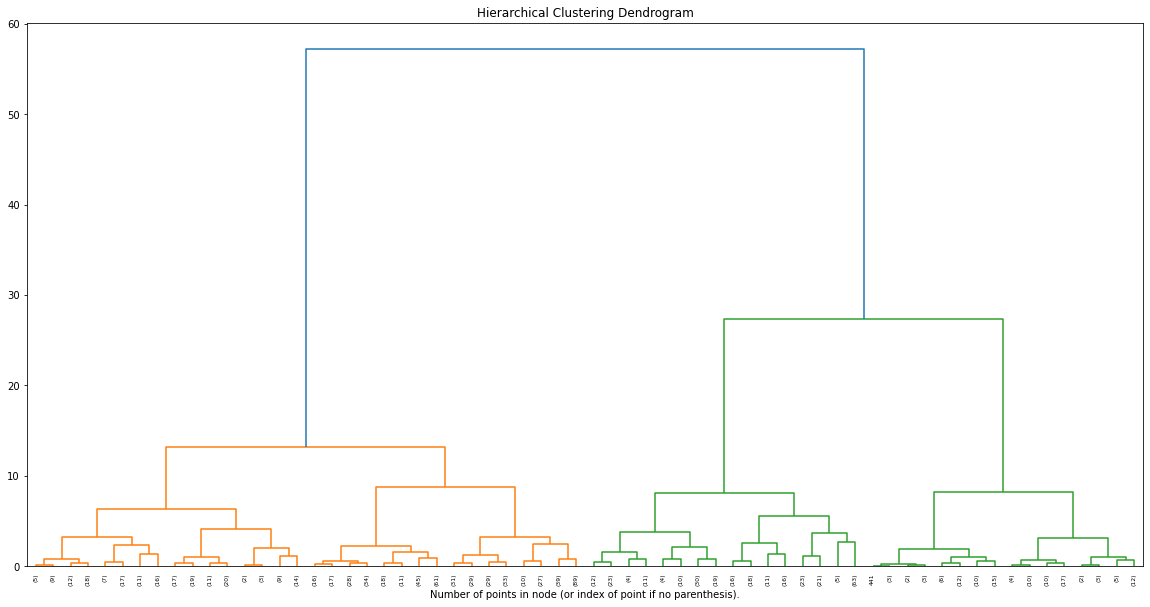

In [53]:
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clusters, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [47]:
clusters.n_clusters_

1108

In [55]:
words['height'] = words['y1'] - words['y0']
words['x_center'] = (words['x0'] + words['x1']) / 2
words['y_center'] = (words['y0'] + words['y1']) / 2

In [56]:
words

,Char,x0,x1,y0,y1,height,x_center,y_center
labels,,,,,,,,
0,Numărul 42 *Revista este valabilă în perioada:...,14.173270,533.930830,31.578590,54.579590,23.001000,274.052050,43.079090
1,OFERTĂ ANIVERSARĂ,213.627170,541.733274,772.787840,802.894840,30.107000,377.680222,787.841340
2,valabilă în perioada: 14.10 - 20.10.2020*,359.631070,540.248859,761.429930,770.935530,9.505600,449.939965,766.182730
3,de premii,199.842570,333.012570,606.163080,636.163080,30.000000,266.427570,621.163080
4,Peste,211.752560,290.142560,736.573050,766.573050,30.000000,250.947560,751.573050
...,...,...,...,...,...,...,...,...
78,Longlife,492.696870,531.415870,332.230380,342.230380,10.000000,512.056370,337.230380
79,AA / AAA1 set,492.696960,529.728960,315.946900,331.946900,16.000000,511.212960,323.946900
80,LUNI&MARȚI,28.664871,149.007395,612.699859,639.800843,27.100984,88.836133,626.250351


In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(words[features])
X_scaled

array([[0.48538178, 0.03707417, 0.44861308],
       [0.68596795, 1.        , 0.63612231],
       [0.82583634, 0.97199692, 0.09250385],
       [0.47062358, 0.78449659, 0.63329885],
       [0.44065995, 0.95310762, 0.63329885],
       [0.69289699, 0.44277907, 0.5541365 ],
       [0.6928974 , 0.41717906, 0.07916236],
       [0.880029  , 0.10695733, 1.        ],
       [0.90100672, 0.16696008, 0.44764241],
       [0.89653689, 0.13539532, 0.3002206 ],
       [0.88303992, 0.49969205, 1.        ],
       [0.90474623, 0.55973756, 0.44590432],
       [0.89843779, 0.52813006, 0.3002206 ],
       [0.19152316, 0.4993294 , 0.31664943],
       [0.21231462, 0.43742064, 0.5541365 ],
       [0.14795519, 0.4686086 , 0.26387452],
       [0.20527059, 0.22936525, 0.33195943],
       [0.55448154, 0.15610451, 0.27469602],
       [0.22422985, 0.16546806, 0.5771015 ],
       [0.57015703, 0.09886016, 0.49120506],
       [0.16219518, 0.19765737, 0.27748253],
       [0.55272193, 0.63109652, 0.27469602],
       [0.

In [117]:
dbscan_g = DBSCAN(eps=0.035, min_samples=1)
dbscan_g.fit(X_scaled)

DBSCAN(eps=0.035, min_samples=1)

In [118]:
words['g_labels'] = dbscan_g.labels_

In [119]:
X_scaled[:,2]

array([0.44861308, 0.63612231, 0.09250385, 0.63329885, 0.63329885,
       0.5541365 , 0.07916236, 1.        , 0.44764241, 0.3002206 ,
       1.        , 0.44590432, 0.3002206 , 0.31664943, 0.5541365 ,
       0.26387452, 0.33195943, 0.27469602, 0.5771015 , 0.49120506,
       0.27748253, 0.27469602, 0.27469602, 0.27469602, 0.49120506,
       0.49120506, 0.49120506, 0.22658114, 0.22658114, 0.22658114,
       0.22658114, 0.26387452, 0.49147361, 0.4268877 , 0.42586624,
       0.21880568, 0.2796237 , 0.10554981, 0.10554981, 0.0527749 ,
       0.0527749 , 0.0527749 , 0.10554981, 0.10554981, 0.10554981,
       0.0527749 , 0.10554981, 0.10554981, 0.10554981, 0.0527749 ,
       0.0527749 , 0.0527749 , 0.44522757, 0.44522757, 0.41593485,
       0.41593485, 0.10554981, 0.10554981, 0.0527749 , 0.0527749 ,
       0.0527749 , 0.10554981, 0.0527749 , 0.0527749 , 0.0527749 ,
       0.10554981, 0.10554981, 0.0527749 , 0.0527749 , 0.0527749 ,
       0.10554981, 0.10554981, 0.0527749 , 0.0527749 , 0.05277

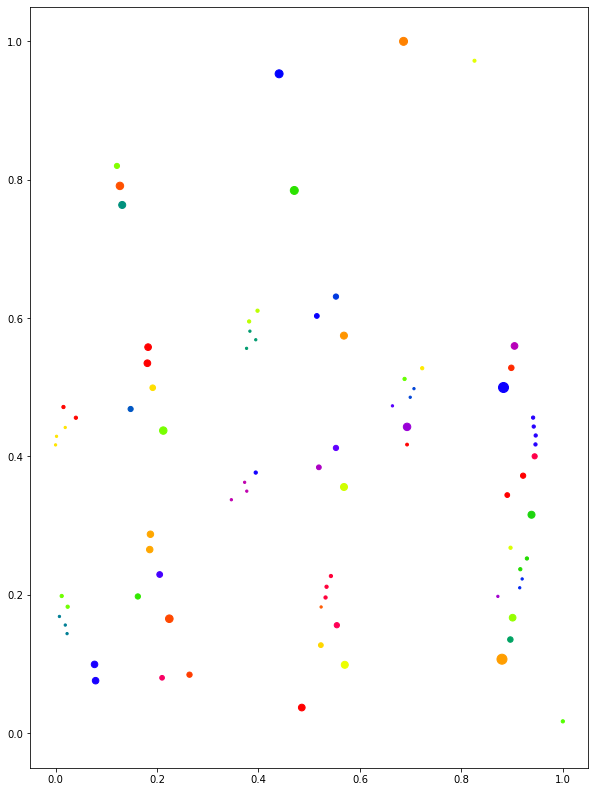

In [120]:
plt.figure(figsize=(10,14))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s= X_scaled[:,2] * 100, c=dbscan_g.labels_, cmap='prism')
plt.show()

In [121]:
words

,Char,x0,x1,y0,y1,height,x_center,y_center,labels,g_labels
labels,,,,,,,,,,
0,Numărul 42 *Revista este valabilă în perioada:...,14.173270,533.930830,31.578590,54.579590,23.001000,274.052050,43.079090,0,0
1,OFERTĂ ANIVERSARĂ,213.627170,541.733274,772.787840,802.894840,30.107000,377.680222,787.841340,1,1
2,valabilă în perioada: 14.10 - 20.10.2020*,359.631070,540.248859,761.429930,770.935530,9.505600,449.939965,766.182730,2,2
3,de premii,199.842570,333.012570,606.163080,636.163080,30.000000,266.427570,621.163080,3,3
4,Peste,211.752560,290.142560,736.573050,766.573050,30.000000,250.947560,751.573050,4,4
...,...,...,...,...,...,...,...,...,...,...
78,Longlife,492.696870,531.415870,332.230380,342.230380,10.000000,512.056370,337.230380,36,56
79,AA / AAA1 set,492.696960,529.728960,315.946900,331.946900,16.000000,511.212960,323.946900,21,57
80,LUNI&MARȚI,28.664871,149.007395,612.699859,639.800843,27.100984,88.836133,626.250351,26,58


In [122]:
def concatenate(series):
    return reduce(lambda x, y: x + ' ' + y, series)

groups = words.groupby('g_labels').agg({'Char': concatenate,
                                  'x0': min,
                                  'x1': max,
                                  'y0': min,
                                  'y1': max})
groups

,Char,x0,x1,y0,y1
g_labels,,,,,
0,Numărul 42 *Revista este valabilă în perioada:...,14.173270,533.930830,31.578590,54.579590
1,OFERTĂ ANIVERSARĂ,213.627170,541.733274,772.787840,802.894840
2,valabilă în perioada: 14.10 - 20.10.2020*,359.631070,540.248859,761.429930,770.935530
3,de premii,199.842570,333.012570,606.163080,636.163080
4,Peste,211.752560,290.142560,736.573050,766.573050
...,...,...,...,...,...
56,VARTA Baterii alcaline Longlife,492.696870,531.836870,332.230380,372.230380
57,AA / AAA1 set,492.696960,529.728960,315.946900,331.946900
58,LUNI&MARȚI,28.664871,149.007395,612.699859,639.800843


In [123]:
groups['height'] = groups['y1'] - groups['y0']
groups['x_center'] = (groups['x0'] + groups['x1']) / 2
groups['y_center'] = (groups['y0'] + groups['y1']) / 2

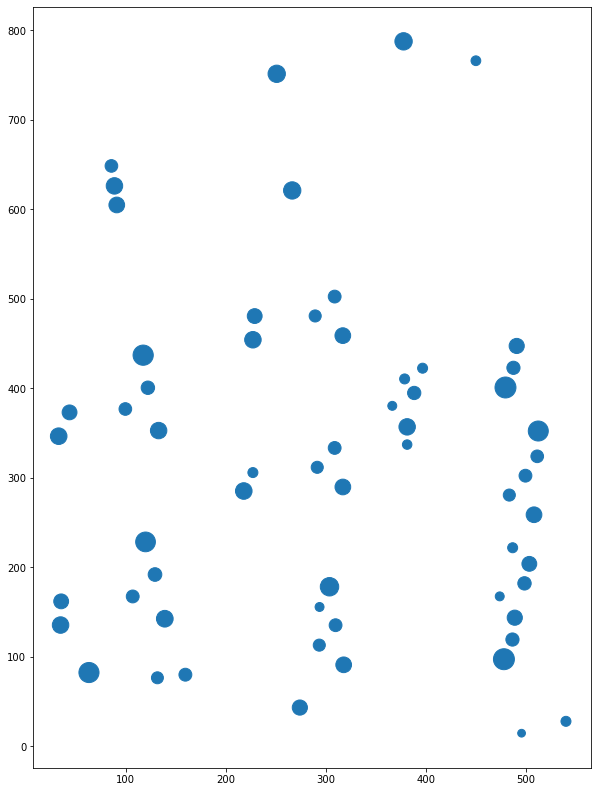

In [124]:
plt.figure(figsize=(10,14))
plt.scatter(groups['x_center'], groups['y_center'], s=groups['height'] * 10, cmap='prism')
plt.show()

In [129]:
groups.to_csv('1st_page_ro42_groups.csv')